In [ ]:
%pip install rasterio

In [2]:
import os
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import numpy as np
import matplotlib.pyplot as plt

In [5]:
raw_raster = rasterio.open("raw_RGB_image.tif")
true_raster = rasterio.open("true_color_RGB_image.tif")

Check type of the variable 'raster'

In [6]:
type(raw_raster)

rasterio.io.DatasetReader

Projection

In [7]:
raw_raster.crs  # outs EPSG:32636 which includes Turkey

CRS.from_epsg(32636)

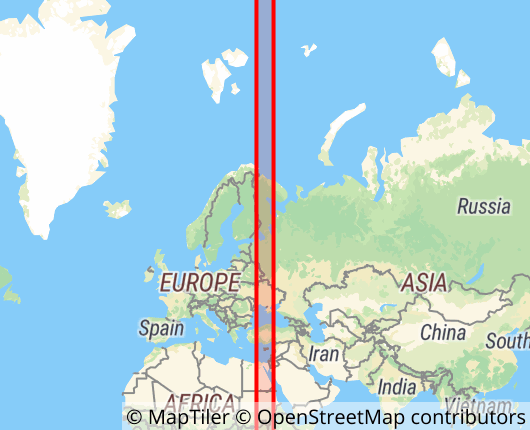

Affine transform (how raster is scaled, rotated, skewed, and/or translated)

In [8]:
raw_raster.transform

Affine(10.0, 0.0, 739440.0,
       0.0, -10.0, 4615020.0)

Raster width and height

In [9]:
raw_raster.width

804

In [10]:
raw_raster.height

693

Number of bands

In [11]:
raw_raster.count

3

Bounds of the file

In [12]:
raw_raster.bounds

BoundingBox(left=739440.0, bottom=4608090.0, right=747480.0, top=4615020.0)

In [13]:
raw_raster.bounds.right - raw_raster.bounds.left # width*10

8040.0

In [14]:
raw_raster.bounds.top - raw_raster.bounds.bottom # height*10

6930.0

Driver (data format)

In [15]:
raw_raster.driver

'GTiff'

No data values for all channels

In [16]:
raw_raster.nodatavals

(None, None, None)

All Metadata for the raster

In [17]:
raw_raster.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 804,
 'height': 693,
 'count': 3,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(10.0, 0.0, 739440.0,
        0.0, -10.0, 4615020.0)}

RGB bands of the satellite image is stacked together in one raster dataset.

Read the raster band as separate variable

In [18]:
band1 = raw_raster.read(1)
# Check type of the variable 'band'
type(band1) # <class 'numpy.ndarray'>

numpy.ndarray

Data type of the values

In [19]:
band1.dtype # uint16

dtype('uint16')

An unsigned 16-bit integer can store 2^16 (=65,536) values ranging from 0 to 65,535.

Satellite optic channels read between 0 and ~7000.

Read all bands

In [20]:
array = raw_raster.read()

Calculate statistics for each band

In [21]:
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

stats

[{'min': 994, 'mean': 1690.3487486808383, 'median': 1588.0, 'max': 5364},
 {'min': 997, 'mean': 1632.349568894345, 'median': 1593.0, 'max': 5176},
 {'min': 940, 'mean': 1408.0579659422942, 'median': 1374.0, 'max': 5104}]

Channels and corresponding wavelengths in nanometers
Red (620 - 750)
Green (495 - 570)
Blue (450 - 495)

Let's see the band distributions in the raw image.

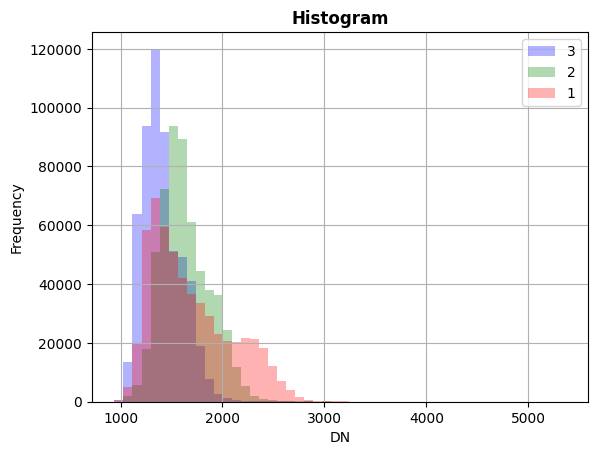

In [22]:
show_hist(raw_raster, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", label = ("1","2","3"))